<a href="https://colab.research.google.com/github/PapiChule/RedesNeuronales/blob/DeltaGeneralized/Delta_Generalizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>

#define TRUE 1
#define FALSE 0

// Tasa de aprendizaje
#define ALPHA 0.1

// Criterio de paro 
#define STOP_CRITERIA 1000

int **crearPatrones(int rows, int n);
void imprimirTabla(int **patrons, int rows, int n);
void calcularPesos(double *weight, double bias, int **patrons, int *values, int n);
double sigmoide(double x);
double sigmoideDerivada(double x);
int funcionActivacion(double y);
double *pesosAleatorios(int size);
double biasAleatorio();

int main(void){

	int n = 2, rows = 4;
	
	// Generar valores de tabla de verdad
	int **patrons = crearPatrones(rows, n);
	  	
  // Creamos valores de salida
	int values[4] = {0,1,1,1};
  	
  // Pesos iniciales
	double *weight = (double *)malloc(sizeof(double) * 2);
	weight[0] = 1.0;
	weight[1] = 1.0;
	
	double bias = -0.5;
	
	//weight = pesosAleatorios(2);
	//bias = biasAleatorio();
		
    calcularPesos(weight, bias, patrons, values, rows);
  	
	return 0;
}

double sigmoide(double x) {

    return 1.0 / (1.0 + exp(-x));

}

double sigmoideDerivada(double x) {

    return sigmoide(x) * (1.0 - sigmoide(x));

}

int funcionActivacion(double y) {

    if(y <= (double) 0.5){
        return 0;
    }else{
        return 1;
    }

}

void calcularPesos(double *weight, double bias, int **patrons, int *values, int rows) {
	
	int i, j;
	double mse;

	for(i = 0; i < STOP_CRITERIA; i++){
		
		mse = 0;

		for(j= 0; j < rows; j++){

            double h = patrons[j][0]*weight[0] + patrons[j][1]*weight[1] + bias;
            double y = sigmoide(h);
            double error = values[j] - y;
            weight[0] = weight[0] + ALPHA * error * sigmoideDerivada(h) * patrons[j][0];
            weight[1] = weight[1] + ALPHA * error * sigmoideDerivada(h) * patrons[j][1];
            bias = bias + ALPHA * error * sigmoideDerivada(h) * bias;

            mse += pow(error, 2);
            
        }
		
		if(i % 10 == 0)
        	printf("Error cuadratico medio: %f\n", mse);

		if(mse < 0.35){
            	printf("Rompe en [%d] con: %f\n", i, mse);
            	i = STOP_CRITERIA;
		}


	}

    for(i = 0; i < rows; i++){

        double h = patrons[i][0]*weight[0] + patrons[i][1]*weight[1] + bias;
        double y = sigmoide(h);
        
        printf("%d OR %d = %d\n", patrons[i][0], patrons[i][1], funcionActivacion(y));

    }

    printf("Pesos y bias finales: w1 = %f, w2 = %f, bias = %f\n", weight[0], weight[1], bias);

}

double *pesosAleatorios(int size) {
	
	int i = 0;
	double *nWeight = (double *)malloc(sizeof(double) * size);
	double numero;
	
	for(i = 0; i < size; i++){
		numero = rand() % 101;
		
		nWeight[i] = numero / 100; 
	}
	
	return nWeight;
}

double biasAleatorio() {
	
	double numero;
	numero = rand() % 101;
	
	return numero / 100;
}

void imprimirTabla(int **patrons, int rows, int n) {
	
	int i, j;
	
	// Generamos matriz con rows valores
	for (i = 0; i < rows; i++) {
	    for (j = 0; j < n; j++) {
		    printf("%d ", patrons[i][j]);
	    }
	    printf("\n");
	}
		
}

int **crearPatrones(int rows, int n) {
	
	int i, j; 
  	
  // Matriz de valores
  int **patrons = (int **)malloc(sizeof(int *) * rows);
  	
	for(i=0;i< rows;i++){
   	patrons[i] = (int*)malloc(sizeof(int) * n);
  } 
  	
  	// Llenar matriz
  	for (i = 0; i < rows; i++) {
	    int decimal = i;
	    for (j = n - 1; j >= 0; j--) {
		    int bit = decimal % 2;
	    	patrons[i][j] = bit;
	      	decimal /= 2;
    	}
  	}
	
	return patrons;
	
}

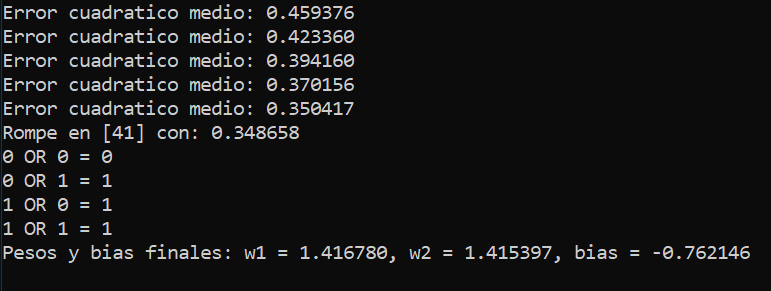